# Association Rule Mining
This notebooks ...

http://r-statistics.co/Association-Mining-With-R.html

First we load the R library for association rule mining. Note that there is no such thing in Python and only basic implementations are available for Python.

In [1]:
library(arules)

NameError: name 'library' is not defined

Load an example data set about groceries

In [3]:
data(Groceries)
inspect(head(Groceries, 10))

     items                     
[1]  {citrus fruit,            
      semi-finished bread,     
      margarine,               
      ready soups}             
[2]  {tropical fruit,          
      yogurt,                  
      coffee}                  
[3]  {whole milk}              
[4]  {pip fruit,               
      yogurt,                  
      cream cheese ,           
      meat spreads}            
[5]  {other vegetables,        
      whole milk,              
      condensed milk,          
      long life bakery product}
[6]  {whole milk,              
      butter,                  
      yogurt,                  
      rice,                    
      abrasive cleaner}        
[7]  {rolls/buns}              
[8]  {other vegetables,        
      UHT-milk,                
      rolls/buns,              
      bottled beer,            
      liquor (appetizer)}      
[9]  {pot plants}              
[10] {whole milk,              
      cereals}                 


Check the number of items in the top five transactions.

In [5]:
size(head(Groceries,10))

[1] 4 3 1 4 4 5 1 5 1 2

In [6]:
ap_frequent_itemsets <- apriori(Groceries, parameter = list (target="frequent itemsets", supp = 0.001, conf = 0.5, maxlen=3)) # maxlen = 3 limits the elements in a rule to 3

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen            target   ext
      3 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(Groceries, parameter = list(target = "frequent itemsets", :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”

 done [0.00s].
writing ... [9969 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [7]:
inspect(head(ap_frequent_itemsets,10))

     items                    support     count
[1]  {hair spray}             0.001118454 11   
[2]  {flower soil/fertilizer} 0.001931876 19   
[3]  {rubbing alcohol}        0.001016777 10   
[4]  {frozen fruits}          0.001220132 12   
[5]  {prosecco}               0.002033554 20   
[6]  {honey}                  0.001525165 15   
[7]  {cream}                  0.001321810 13   
[8]  {decalcifier}            0.001525165 15   
[9]  {organic products}       0.001626843 16   
[10] {soap}                   0.002643620 26   


In [8]:
# maxlen = 3 limits the elements in a rule to 3
rules <- apriori(Groceries, parameter = list (supp = 0.001, conf = 0.5, maxlen=3)) 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
      3  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(Groceries, parameter = list(supp = 0.001, conf = 0.5, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”

 done [0.00s].
writing ... [1472 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [10]:
frequentItems <- eclat (Groceries, parameter = list(supp = 0.07, maxlen = 15)) # calculates support for frequent items inspect(frequentItems)


Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE    0.07      1     15 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 688 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [18 item(s)] done [0.00s].
creating sparse bit matrix ... [18 row(s), 9835 column(s)] done [0.00s].
writing  ... [19 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].


In [11]:
LIST(head(Groceries, 3))

[[1]]
[1] "citrus fruit"        "semi-finished bread" "margarine"          
[4] "ready soups"        

[[2]]
[1] "tropical fruit" "yogurt"         "coffee"        

[[3]]
[1] "whole milk"

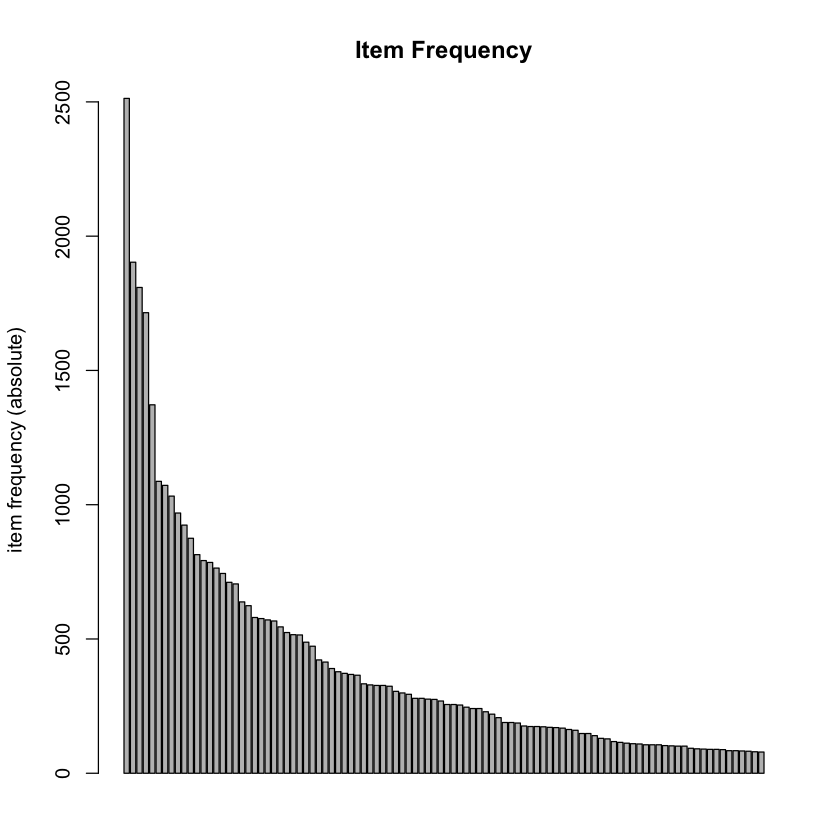

In [12]:
# plot frequent items
itemFrequencyPlot(Groceries, names = FALSE, topN=100, type="absolute", main="Item Frequency") 

In [13]:
# Min Support as 0.001, confidence as 0.8.
rules <- apriori (Groceries, parameter = list(supp = 0.001, conf = 0.5)) 

# 'high-confidence' rules.
rules_conf <- sort (rules, by="confidence", decreasing=TRUE) 
inspect(head(rules_conf)) 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [5668 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                     rhs                    support confidence     lift count
[1] {rice,                                                                          
     sugar}              => {whole milk}       0.001220132          1 3.913649    12
[2] {canned fish,       

In [14]:
rules_lift <- sort (rules, by="lift", decreasing=TRUE) # 'high-lift' rules.
inspect(head(rules_lift)) # show the support, lift and confidence for all rules

    lhs                        rhs                  support confidence     lift count
[1] {Instant food products,                                                          
     soda}                  => {hamburger meat} 0.001220132  0.6315789 18.99565    12
[2] {soda,                                                                           
     popcorn}               => {salty snack}    0.001220132  0.6315789 16.69779    12
[3] {flour,                                                                          
     baking powder}         => {sugar}          0.001016777  0.5555556 16.40807    10
[4] {ham,                                                                            
     processed cheese}      => {white bread}    0.001931876  0.6333333 15.04549    19
[5] {whole milk,                                                                     
     Instant food products} => {hamburger meat} 0.001525165  0.5000000 15.03823    15
[6] {other vegetables,                                

In [15]:
subsetRules <- which(colSums(is.subset(rules, rules)) > 1) # get subset rules in vector
length(subsetRules)  #> 3913
rules <- rules[-subsetRules] # remove subset rules. 

[1] 3913

This can be achieved by modifying the appearance parameter in the apriori() function. For example,

To find what factors influenced purchase of product X

To find out what customers had purchased before buying ‘Whole Milk’. This will help you understand the patterns that led to the purchase of ‘whole milk’.

In [16]:
rules <- apriori (data=Groceries, parameter=list (supp=0.001,conf = 0.08), appearance = list (default="lhs",rhs="whole milk"), control = list (verbose=F)) # get rules that lead to buying 'whole milk'
rules_conf <- sort (rules, by="confidence", decreasing=TRUE) # 'high-confidence' rules.
inspect(head(rules_conf))

    lhs                     rhs              support confidence     lift count
[1] {rice,                                                                    
     sugar}              => {whole milk} 0.001220132          1 3.913649    12
[2] {canned fish,                                                             
     hygiene articles}   => {whole milk} 0.001118454          1 3.913649    11
[3] {root vegetables,                                                         
     butter,                                                                  
     rice}               => {whole milk} 0.001016777          1 3.913649    10
[4] {root vegetables,                                                         
     whipped/sour cream,                                                      
     flour}              => {whole milk} 0.001728521          1 3.913649    17
[5] {butter,                                                                  
     soft cheese,                                   

In [17]:
rules <- apriori (data=Groceries, parameter=list (supp=0.001,conf = 0.15,minlen=2), appearance = list(default="rhs",lhs="whole milk"), control = list (verbose=F)) # those who bought 'milk' also bought..
rules_conf <- sort (rules, by="confidence", decreasing=TRUE) # 'high-confidence' rules.
inspect(head(rules_conf))

    lhs             rhs                support    confidence lift      count
[1] {whole milk} => {other vegetables} 0.07483477 0.2928770  1.5136341 736  
[2] {whole milk} => {rolls/buns}       0.05663447 0.2216474  1.2050318 557  
[3] {whole milk} => {yogurt}           0.05602440 0.2192598  1.5717351 551  
[4] {whole milk} => {root vegetables}  0.04890696 0.1914047  1.7560310 481  
[5] {whole milk} => {tropical fruit}   0.04229792 0.1655392  1.5775950 416  
[6] {whole milk} => {soda}             0.04006101 0.1567847  0.8991124 394  
